In [20]:
import os
os.getcwd()


'/Users/ilhamhafidz/fraud-detection-app'

In [21]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path.cwd()
DATA_PATH = PROJECT_ROOT / "data" / "creditcard.csv"

print(DATA_PATH)
print(DATA_PATH.exists())

df = pd.read_csv(DATA_PATH)
df.head()


/Users/ilhamhafidz/fraud-detection-app/data/creditcard.csv
True


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df.shape
df.info()
df["Class"].value_counts()
df["Class"].value_counts(normalize=True) * 100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

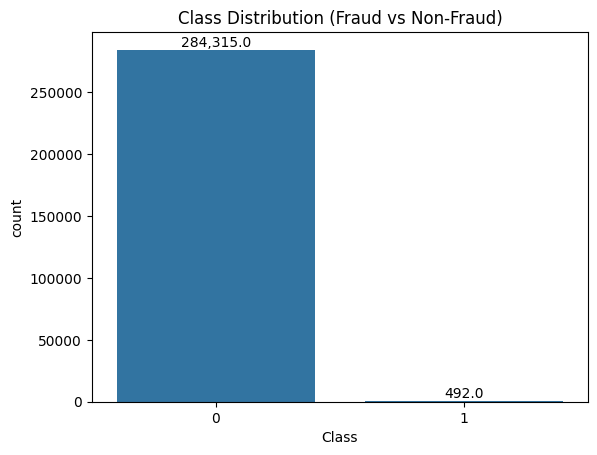

In [23]:
ax = sns.countplot(x="Class", data=df)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

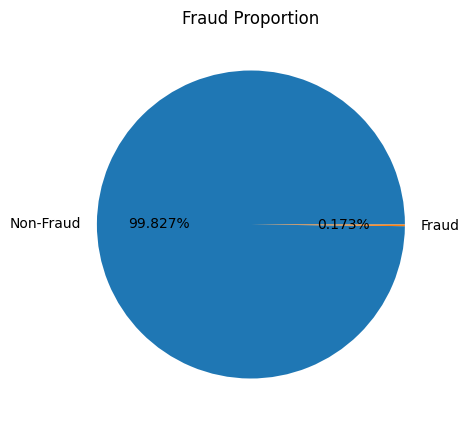

In [24]:
df["Class"].value_counts().plot.pie(
    autopct="%.3f%%",
    labels=["Non-Fraud", "Fraud"],
    figsize=(5,5)
)
plt.ylabel("")
plt.title("Fraud Proportion")
plt.show()

In [30]:
X = df.drop("Class", axis=1)
y = df["Class"]

print(X.shape, y.shape)

(284807, 30) (284807,)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(y_train.value_counts(normalize=True) * 100)
print(y_test.value_counts(normalize=True) * 100)

Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_baseline.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf_baseline.predict(X_test_scaled)
y_proba = rf_baseline.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56859     5]
 [   18    80]]
ROC-AUC: 0.9630272515590367


In [43]:
# ==============================
# Experiment 1: RandomForest with class_weight
# ==============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_weighted = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf_weighted.fit(X_train_scaled, y_train)

y_pred_w = rf_weighted.predict(X_test_scaled)
y_proba_w = rf_weighted.predict_proba(X_test_scaled)[:, 1]

print("RandomForest (class_weight='balanced')")
print(classification_report(y_test, y_pred_w))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_w))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_w))

RandomForest (class_weight='balanced')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56861     3]
 [   25    73]]
ROC-AUC: 0.9529085867605341


In [44]:
# ==============================
# Experiment 2: RandomForest + SMOTE
# ==============================

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_smote.fit(X_resampled, y_resampled)

y_pred_s = rf_smote.predict(X_test_scaled)
y_proba_s = rf_smote.predict_proba(X_test_scaled)[:, 1]

print("RandomForest + SMOTE")
print(classification_report(y_test, y_pred_s))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_s))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_s))

RandomForest + SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56852    12]
 [   17    81]]
ROC-AUC: 0.9684430556831625


In [48]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_s)

# contoh threshold custom
custom_threshold = 0.3
y_pred_custom = (y_proba_s >= custom_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))
print(confusion_matrix(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.89      0.78        98

    accuracy                           1.00     56962
   macro avg       0.85      0.94      0.89     56962
weighted avg       1.00      1.00      1.00     56962

[[56827    37]
 [   11    87]]


In [52]:
import joblib

joblib.dump(rf_smote, "models/fraud_rf_smote.pkl")
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']